# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Arif Wicaksono
- **Email:** arifwicaksono947@gmail.com
- **ID Dicoding:** arifwcksn26

## Menentukan Pertanyaan Bisnis

- Bagaimana Demografi pelanggan yang dimiliki ?
- Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Tahun Terakhir?
- Kategori Produk apa yang paling banyak terjual?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Identifikasi tabel `customer_df`

In [4]:
customers_df = pd.read_csv('data/customers_dataset.csv') 
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- kita memperoleh informasi bahwa terdapat 94,411 pelanggan yang terdaftar, dengan distribusi kode pos yang bervariasi. Data menunjukkan bahwa pelanggan berasal dari 4,119 kota dan 27 negara bagian di Brasil.
- kita dapat melihat bahwa segmentasi pelanggan cukup luas, mencakup berbagai lokasi dan demografi. Rata-rata pelanggan berasal dari kode pos dengan nilai rata-rata 35,137.45, menunjukkan adanya konsentrasi pelanggan yang signifikan di wilayah tertentu, seperti são paulo, yang merupakan kota dengan frekuensi tertinggi.

#### Identifikasi tabel `order_df`

In [5]:
orders_df = pd.read_csv('data/orders_dataset.csv') 
selected_columns = ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp','order_approved_at','order_estimated_delivery_date']
orders_df = orders_df[selected_columns]
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-26 00:00:00


**Insight:**
- Dengan membandingkan tanggal pengiriman yang diharapkan dan tanggal pengiriman yang sebenarnya, dapat dihitung persentase pengiriman tepat waktu. Ini penting untuk menilai efisiensi operasional dan meningkatkan kepuasan pelanggan.
- Melalui analisis kolom customer_id, pola pembelian pelanggan dapat diidentifikasi, termasuk seberapa sering pelanggan melakukan order. Ini membantu dalam segmentasi pelanggan dan pengembangan strategi pemasaran yang lebih efektif.

#### Identifikasi tabel `payment_df`

In [6]:
payment_df = pd.read_csv('data/order_payments_dataset.csv')
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Identifikasi tabel `order_item_df`

In [7]:
order_item_df = pd.read_csv ('data/order_items_dataset.csv')
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Identifikasi tabel `product_df`

In [96]:
product_df = pd.read_csv('data/products_dataset.csv')
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight:**
- Terdapat 32,951 produk yang terdaftar, menunjukkan variasi yang signifikan dalam penawaran produk. Ini dapat membantu dalam menganalisis keberagaman dan daya tarik produk di pasar.
- Rata-rata panjang deskripsi produk dapat dianalisis untuk menentukan apakah informasi yang diberikan cukup untuk menarik minat pelanggan. Deskripsi yang lebih panjang dapat menunjukkan produk yang lebih kompleks, sementara deskripsi yang pendek mungkin memerlukan tambahan informasi untuk meningkatkan daya tarik.

#### Identifikasi tabel `seller_df`

In [97]:
seller_df = pd.read_csv('data/sellers_dataset.csv')
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**Insight:**
- Terdapat 3,095 penjual yang terdaftar, dengan konsentrasi yang signifikan berada di wilayah São Paulo, SP. Ini menunjukkan potensi pasar yang besar di daerah tersebut, serta kemungkinan adanya cluster penjual yang dapat dimanfaatkan untuk strategi pemasaran lokal.
- Rata-rata kode pos penjual adalah 32291.059 dengan rentang yang luas (min 10001.000 hingga max 99730.000). Ini menunjukkan bahwa penjual tersebar di berbagai area, yang dapat mempengaruhi aspek logistik dan pengiriman produk.

### Assessing Data

#### Menilai tabel `customer_df`

In [10]:
customers_df.info()
customers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [11]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- DataFrame customers_df memiliki 99,404 entri dengan tidak ada nilai yang hilang di semua kolom. Ini menunjukkan bahwa data pelanggan lengkap dan siap untuk analisis.
- Kolom seperti customer_zip_code_prefix, customer_city, dan customer_state memungkinkan analisis distribusi geografis pelanggan. Ini dapat membantu dalam merumuskan strategi pemasaran yang lebih terfokus dan efisien berdasarkan lokasi.

#### Menilai tabel `orders_df`

In [12]:
orders_df.info()
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_estimated_delivery_date  99441 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                160
order_estimated_delivery_date      0
dtype: int64

In [13]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()


Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,99441
unique,99441,99441,8,98875,90733,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2017-12-20 00:00:00
freq,1,1,96478,3,9,522


**Insight:**
- Kolom order_delivered_customer_date memiliki 94.476 entri non-null, menunjukkan bahwa ada 2.965 entri yang hilang. Ini bisa menunjukkan bahwa beberapa pesanan belum sampai ke pelanggan atau statusnya belum diperbarui
- Kolom order_status menunjukkan berbagai status pesanan yang dapat memberikan wawasan tentang proses pemenuhan. Jika terdapat banyak pesanan yang berstatus "dikirim" tetapi belum sampai, ini bisa mengindikasikan masalah dalam pengiriman atau komunikasi dengan kurir.

#### Menilai tabel `order_item_df`

In [14]:
order_item_df.info()
order_item_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [15]:
print("Jumlah duplikasi: ",order_item_df.duplicated().sum())
order_item_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai tabel `payment_df`

In [16]:
payment_df.info()
payment_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [17]:
print("Jumlah duplikasi: ",payment_df.duplicated().sum())
payment_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai tabel `product_df`

In [18]:
product_df.info()
product_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [19]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())
product_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Kolom product_weight_g dll dapat memberikan wawasan tentang kategori produk. Misalnya, kategori makanan mungkin memiliki berat yang berbeda dibandingkan dengan barang elektronik. Ini juga bisa digunakan untuk analisis logistik dan pengiriman.
- Dengan 610 nilai hilang pada kolom product_category_name dll penting untuk menganalisis distribusi kategori yang ada. Ini bisa membantu dalam memahami proporsi produk dalam berbagai kategori dan mengidentifikasi kategori yang mungkin kurang terwakili.

#### Menilai tabel `seller_df`

In [20]:
seller_df.info()
seller_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [21]:
print("Jumlah duplikasi: ", seller_df.duplicated().sum())
seller_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

#### Membersihkan tabel `orders_df`

In [22]:
orders_df.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                160
order_estimated_delivery_date      0
dtype: int64

In [23]:
orders_df.duplicated().sum()

np.int64(0)

In [24]:
orders_df[orders_df.order_approved_at.isna()]
orders_df.order_approved_at.value_counts()

order_approved_at
2018-02-27 04:31:10    9
2017-12-05 10:30:42    7
2018-02-06 05:31:52    7
2017-11-07 07:30:38    7
2017-11-07 07:30:29    7
                      ..
2017-10-02 08:56:53    1
2017-06-08 02:45:24    1
2017-07-05 17:43:48    1
2018-05-25 17:15:21    1
2017-07-09 22:10:13    1
Name: count, Length: 90733, dtype: int64

In [25]:
orders_df.fillna(value="2018-02-27 04:31:10", inplace=True)
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_estimated_delivery_date    0
dtype: int64

Mengubah tipe data object menjadi date time

In [26]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at","order_estimated_delivery_date" ]
for column in datetime_columns:
    orders_df[column]=pd.to_datetime(orders_df[column])

In [27]:
orders_df.info()
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 4.6+ MB
Jumlah duplikasi:  0


In [28]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-26


#### Membersihkan tabel `order_item_df`

In [29]:
order_item_df.isna().sum()
order_item_df.duplicated().sum()

np.int64(0)

In [30]:
datetime_columns = ["shipping_limit_date" ]
for column in datetime_columns:
    order_item_df[column]=pd.to_datetime(order_item_df[column])

In [31]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Membersihkan tabel `product_df`

In [32]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [33]:
product_df[product_df.product_name_lenght.isna()]
product_df.product_name_lenght.value_counts()

product_name_lenght
60.0    2182
59.0    2025
58.0    1887
57.0    1719
55.0    1683
        ... 
66.0       1
72.0       1
67.0       1
76.0       1
6.0        1
Name: count, Length: 66, dtype: int64

In [34]:
product_df.fillna(value="60.0", inplace=True)
product_df.isna().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_8276\3070792045.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '60.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  product_df.fillna(value="60.0", inplace=True)


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [35]:
product_df.duplicated().sum()


np.int64(0)

In [36]:
float_columns = ['product_length_cm', 'product_height_cm', 'product_width_cm']

# Loop untuk mengubah tipe data dari object ke float
for column in float_columns:
    product_df[column] = pd.to_numeric(product_df[column], errors='coerce')

In [37]:
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## Exploratory Data Analysis (EDA)

### Explore Data Customer 

In [38]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
58004,2836f9005cb3054b35cf70739711bda7,4dd43ddd16316a2f26f6e8375f2bc0a6,11045,santos,SP
22536,a14a54843c4b23ca87386fe6088fb649,4397cdacb59ba0ceee5f45401a8ba313,88850,forquilhinha,SC
81052,94433870320f80ea3eb45f2e83969746,2d170cd13ebaea10fd00ad9e40c35d3d,17604,tupa,SP
62062,2381dc24b79f58780240a6892ad9db15,5c768e38434aeda51ba32eaaf77d14e8,40155,salvador,BA
56989,93d5fd8f7db0fa4ca0ed24b83f12505b,3f9de4e584f4860b145d95ac29c06ea1,21930,rio de janeiro,RJ


In [39]:
customers_df.customer_id.is_unique

True

In [40]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [41]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore Data Order

In [42]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 20:48:25.588771072,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:35:20,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 17:42:49,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 17:10:24,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-11-12 00:00:00


In [43]:
delivery_time = orders_df['order_estimated_delivery_date'] - orders_df['order_approved_at']
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [44]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,16.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13,18.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04,27.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-15,26.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-26,12.0


### Explore Data Payment

In [45]:
payment_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [46]:
payment_df.order_id.is_unique

False

### Menggabungkan Data Payment & Orders

In [47]:
orders_payment_df = pd.merge(
    left=orders_df,
    right=payment_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

selected_columns = ['order_id', 'customer_id', 'order_status', 'payment_type','payment_value','order_purchase_timestamp','order_approved_at', 'order_estimated_delivery_date','delivery_time']
orders_payment_df = orders_payment_df[selected_columns]
orders_payment_df.head()

,order_id,customer_id,order_status,payment_type,payment_value,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,credit_card,18.12,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,16.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,voucher,2.00,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,16.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,voucher,18.59,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,16.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,boleto,141.46,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13,18.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,credit_card,179.12,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04,27.0


### Menggabungkan Data Customer & Order_payment

In [48]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
65899,e4aea95358ec5c29077375c4ba98a975,dc15b804fc0d87ff79b62183224e13ae,35170,coronel fabriciano,MG,Active
42972,be4b48d66cff1a9eaa83eaff55037d32,dcaf8d5e98ef6b981b962016d768d5ba,21750,rio de janeiro,RJ,Active
49536,42c73f6fb9c46216dcf705cce9cc7dd7,d329379cee2cf84319a59b33258e9ff1,72596,brasilia,DF,Active
92072,8ba470efe6e87cdab5e58ead2e2e94ec,4fda45871d644d13d55b6626a91f24f9,4843,sao paulo,SP,Active
10302,98eb23682f18837a3a22b1c7130d6a48,bbb4a3998a2b9baf32489882527762b7,91260,porto alegre,RS,Active


In [49]:
customers_df.groupby(by="status").customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

In [50]:
customer_order_payment_df = pd.merge(
    left=customers_df,
    right=orders_payment_df,
    how='inner',
    on='customer_id'
)

customer_order_payment_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,payment_type,payment_value,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,credit_card,146.87,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-06-05,19.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,credit_card,335.48,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-02-06,24.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,credit_card,157.73,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-13,23.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,credit_card,173.30,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-04-10,27.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,credit_card,252.25,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-08-15,17.0


Menentukan Pengiriman Tepat Waktu

In [51]:
customer_order_payment_df['actual_delivery_date'] = customer_order_payment_df['order_approved_at'] + pd.to_timedelta(customer_order_payment_df['delivery_time'], unit='h')

# Tentukan apakah pengiriman tepat waktu
customer_order_payment_df['on_time_delivery'] = customer_order_payment_df['actual_delivery_date'] <= customer_order_payment_df['order_estimated_delivery_date']

# Menampilkan DataFrame dengan kolom yang diinginkan
result = customer_order_payment_df[['order_approved_at', 'order_estimated_delivery_date', 'on_time_delivery']]
print(result)

         order_approved_at order_estimated_delivery_date  on_time_delivery
0      2017-05-16 15:22:12                    2017-06-05              True
1      2018-01-12 20:58:32                    2018-02-06              True
2      2018-05-20 16:19:10                    2018-06-13              True
3      2018-03-13 17:29:19                    2018-04-10              True
4      2018-07-29 10:10:09                    2018-08-15              True
...                    ...                           ...               ...
103881 2018-04-07 16:08:45                    2018-04-25              True
103882 2018-04-04 08:35:12                    2018-04-20              True
103883 2018-04-08 20:30:03                    2018-05-02              True
103884 2017-11-03 21:31:20                    2017-12-05              True
103885 2017-12-19 18:50:39                    2018-01-08              True

[103886 rows x 3 columns]


**Insight:**
- Jika sebagian besar pengiriman tepat waktu (True), ini menunjukkan bahwa perusahaan memiliki sistem logistik yang efisien dan dapat meningkatkan kepuasan pelanggan. Tingkat ketepatan pengiriman yang tinggi dapat menjadi faktor penting dalam mempertahankan dan menarik pelanggan baru.

Total pembayaran berdasarkan metode

In [52]:
total_payment_by_type = customer_order_payment_df.groupby('payment_type')['payment_value'].sum()

print(total_payment_by_type)

payment_type
boleto          2869361.27
credit_card    12542084.19
debit_card       217989.79
not_defined           0.00
voucher          379436.87
Name: payment_value, dtype: float64


**Insight:**
- Jika satu metode pembayaran, seperti "credit_card", menunjukkan total yang jauh lebih tinggi dibandingkan dengan metode lain, ini menunjukkan preferensi pelanggan. Perusahaan dapat memanfaatkan informasi ini untuk meningkatkan kemudahan dan promosi terkait metode pembayaran yang paling banyak digunakan.

Jenis Pembayaran

In [53]:
customer_order_payment_df.groupby(by="payment_type").payment_type.nunique().sort_values(ascending=False)

payment_type
boleto         1
credit_card    1
debit_card     1
not_defined    1
voucher        1
Name: payment_type, dtype: int64

Jumlah order berdasarkan kota

In [54]:
customer_order_payment_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


**Insight:**
- Kota seperti "São Paulo" dan "Rio de Janeiro" menunjukkan jumlah order yang sangat tinggi. Ini menunjukkan potensi pasar yang signifikan di daerah tersebut. Perusahaan dapat mempertimbangkan untuk meningkatkan upaya pemasaran dan promosi di kota-kota ini untuk lebih memanfaatkan potensi permintaan.

Jumlah order berdasarkan state

In [55]:
customer_order_payment_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    41745
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64

Jenis Pembayaran terbanyak

In [56]:
customer_order_payment_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).reset_index()

,payment_type,order_id
0,credit_card,76505
1,boleto,19784
2,voucher,3866
3,debit_card,1528
4,not_defined,3


**Insight:**
- Metode pembayaran "credit_card" dan "boleto" memiliki jumlah order yang jauh lebih tinggi dibandingkan dengan metode lain. Ini menunjukkan bahwa pelanggan lebih suka menggunakan metode tersebut, yang dapat menjadi fokus dalam promosi dan komunikasi pemasaran untuk meningkatkan konversi.

### Menggabungkan Data Product & Item

In [57]:
product_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.0,32951,32951.0,32951.0,32951.000000,32951.000000,32951.000000
unique,32951,74,67.0,2961,20.0,2205.0,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,60.0,60.0,1.0,200.0,NaN,NaN,NaN
freq,1,3029,2182.0,610,16489.0,2084.0,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,30.816849,16.940275,23.198962
std,NaN,NaN,NaN,NaN,NaN,NaN,16.915473,13.641266,12.082083
min,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,2.000000,6.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,8.000000,15.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,13.000000,20.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,38.000000,21.000000,30.000000


In [58]:
order_item_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [59]:
product_item_df = pd.merge(
    left=product_df,
    right=order_item_df,
    how="inner",
    left_on="product_id",  # Kolom yang sesuai di orders_df
    right_on="product_id"  # Kolom yang sesuai di order_items_df
)
selected_columns = ['product_id', 'product_category_name', 'order_item_id','seller_id', 'shipping_limit_date','freight_value', 'price']

product_item_df = product_item_df[selected_columns]

product_item_df.head()

,product_id,product_category_name,order_item_id,seller_id,shipping_limit_date,freight_value,price
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,7.39,10.91
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,17.99,248.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,7.82,79.80
3,cef67bcfe19066a932b7673e239eb23d,bebes,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,9.54,112.30
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,8.29,37.90


In [60]:
product_item_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,order_item_id,seller_id,shipping_limit_date,freight_value,price
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,194.31,6735.00
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,193.21,6729.00
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,227.66,6499.00
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,151.34,4799.00
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,74.34,4690.00
...,...,...,...,...,...,...,...
55908,05b515fdc76e888aada3c6d66c201dff,beleza_saude,8,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.89,1.20
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.89,1.20
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,18.23,0.85
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,22.30,0.85


**Insight:**
- Dengan melihat produk yang memiliki harga lebih rendah, perusahaan dapat melakukan analisis persaingan untuk menentukan apakah ada peluang untuk menyesuaikan harga atau meningkatkan nilai produk. Ini juga dapat membantu dalam mengidentifikasi segmen pasar yang mungkin kurang terlayani, memungkinkan perusahaan untuk menyesuaikan penawaran produk atau layanan

### Menggabungkan Data Product Item & Seller

In [62]:
seller_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [63]:
seller_product_df = pd.merge(
    left=seller_df,
    right=product_item_df,
    how="left",
    left_on="seller_id",  # Kolom yang sesuai di orders_df
    right_on="seller_id"  # Kolom yang sesuai di order_items_df
)


seller_product_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,product_id,product_category_name,order_item_id,shipping_limit_date,freight_value,price
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,ffb64e34a37740dafb6c88f1abd1fa61,esporte_lazer,1,2017-08-25 20:50:19,9.56,106.20
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,325a06bcce0da45b7f4ecf2797dd40e4,esporte_lazer,2,2017-09-05 12:50:19,2.42,10.80
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,f4621f8ad6f54a2e3c408884068be46d,esporte_lazer,1,2017-05-11 16:25:11,15.92,101.70
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,55103cbbe0851d3a303a022cc4140628,malas_acessorios,1,2017-08-17 23:30:18,23.40,199.90
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,1c36a5285f7f3b1ed2637d7c528ce5ff,malas_acessorios,1,2017-11-22 04:30:29,45.09,89.99


In [95]:
seller_product_df.groupby(by='product_category_name').agg({
    'product_id': 'nunique',  
    'order_item_id': 'sum',   
    'price': ['min', 'max']   
})


product_id order_item_id  price         
                             nunique           sum    min      max
product_category_name                                             
60.0                             610          1878   3.00  3980.00
agro_industria_e_comercio         74           265  12.99  2990.00
alimentos                         82           609   9.99   274.99
alimentos_bebidas                104           365   6.50   699.90
artes                             55           230   3.50  6499.00
...                              ...           ...    ...      ...
sinalizacao_e_seguranca           93           307   4.50   740.00
tablets_impressao_imagem           9            89  14.90   889.99
telefonia                       1134          5161   5.00  2428.00
telefonia_fixa                   116           366   6.00  1790.00
utilidades_domesticas           2335          9051   3.06  6735.00

[74 rows x 4 columns]

**Insight:**
- Dengan adanya rentang harga yang luas di beberapa kategori, perusahaan bisa mengeksplorasi peluang untuk memperkenalkan produk baru dalam berbagai segmen harga. Misalnya, kategori dengan harga maksimum yang tinggi dapat menjadi area untuk inovasi produk atau peluncuran barang premium yang menarik pelanggan yang mencari kualitas lebih.

In [65]:
seller_product_df.groupby('product_category_name').agg({
    'price': 'mean'  # Rata-rata harga
}).rename(columns={'price': 'average_price'})

,average_price
product_category_name,
60.0,111.999551
agro_industria_e_comercio,342.124858
alimentos,57.634137
alimentos_bebidas,54.602446
artes,115.802105
...,...
sinalizacao_e_seguranca,108.086583
tablets_impressao_imagem,90.703735
telefonia,71.213978


In [66]:
customer_order_payment_df.to_csv("customer_order.csv", index=False)

In [67]:
seller_product_df.to_csv("seller_product.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana Demografi pelanggan yang dimiliki ?

In [68]:
bycity_df = customer_order_payment_df.groupby(by="customer_city").customer_id.nunique().reset_index()

bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bycity_df = bycity_df.sort_values(by="customer_count", ascending=False).head(5)
bycity_df.head()

,customer_city,customer_count
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521


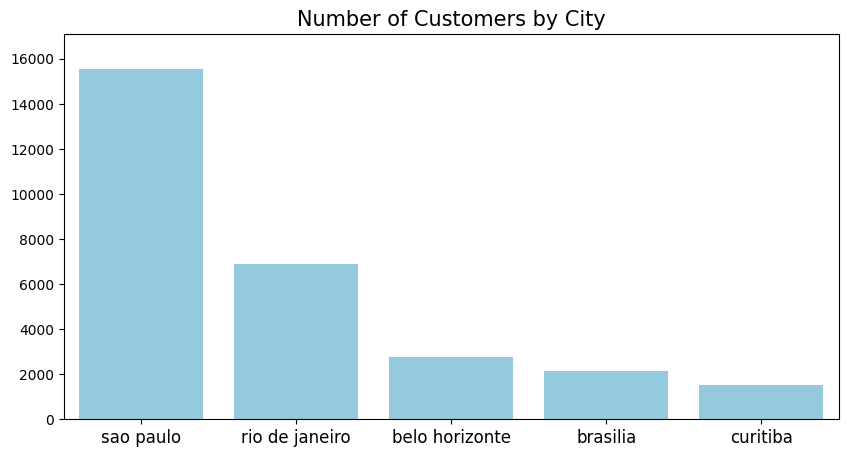

In [69]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count", 
    x="customer_city",
    data=bycity_df.sort_values(by="customer_count", ascending=False).head(5),
    color='skyblue'
)

# Mengatur batas sumbu y
plt.ylim(0, bycity_df['customer_count'].max() * 1.1)

# Menambahkan judul dan label
plt.title("Number of Customers by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

# Menampilkan grafik
plt.show()

**Insight:**
- Kota São Paulo memiliki jumlah pelanggan unik yang sangat tinggi, yaitu 15.540, yang jauh lebih banyak dibandingkan dengan kota lainnya. Hal ini menunjukkan bahwa São Paulo adalah pasar yang sangat penting dan potensial bagi bisnis.
- Meskipun kota-kota seperti Rio de Janeiro dan Belo Horizonte memiliki jumlah pelanggan yang signifikan (6.882 dan 2.773, masing-masing), ada peluang untuk meningkatkan jumlah pelanggan di kota yang lebih kecil seperti Brasília dan Curitiba, yang memiliki jumlah pelanggan di bawah 2.500. Meningkatkan upaya pemasaran dan penawaran khusus di kota-kota ini dapat membantu menarik lebih banyak pelanggan dan memperluas pangsa pasar di wilayah tersebut.

### Pertanyaan 2: Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Tahun Terakhir?

In [70]:
yearly_orders_df = customer_order_payment_df.resample(rule='YE', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})

yearly_orders_df.index = yearly_orders_df.index.strftime('%Y')

yearly_orders_df = yearly_orders_df.reset_index()

yearly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

yearly_orders_df.head()

,order_purchase_timestamp,order_count,revenue
0,2016,328,59362.34
1,2017,45101,7249746.73
2,2018,54011,8699763.05


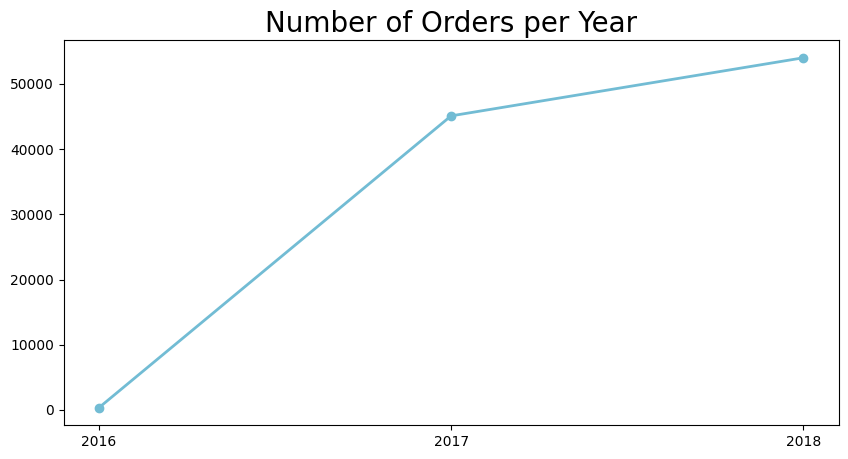

In [71]:
plt.figure(figsize=(10, 5)) 
plt.plot(yearly_orders_df["order_purchase_timestamp"], yearly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Orders per Year", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()


**Insight:**
- Terlihat ada tren peningkatan yang signifikan dalam jumlah pesanan dari tahun ke tahun. Ini menunjukkan bahwa bisnis sedang berkembang dan semakin banyak pelanggan yang melakukan pembelian.
- Berdasarkan tren ini, perusahaan dapat memanfaatkan momentum pertumbuhan untuk merencanakan strategi pemasaran dan pengembangan produk lebih lanjut, serta mempertimbangkan investasi dalam kapasitas produksi atau layanan pelanggan.

### Pertanyaan 3: Kategori Produk apa yang paling banyak terjual?

In [72]:
category_summary = seller_product_df.groupby('product_category_name').agg({
    'product_id': 'nunique',  
    'price': 'sum'            
}).reset_index()

category_summary.columns = ['Product Category', 'Unique Product Count', 'Total Price']
category_summary_sorted = category_summary.sort_values(by='Total Price', ascending=False)
category_summary_sorted.head()

,Product Category,Unique Product Count,Total Price
12,beleza_saude,2444,1258681.34
67,relogios_presentes,1329,1205005.68
14,cama_mesa_banho,3029,1036988.68
33,esporte_lazer,2867,988048.97
45,informatica_acessorios,1639,911954.32


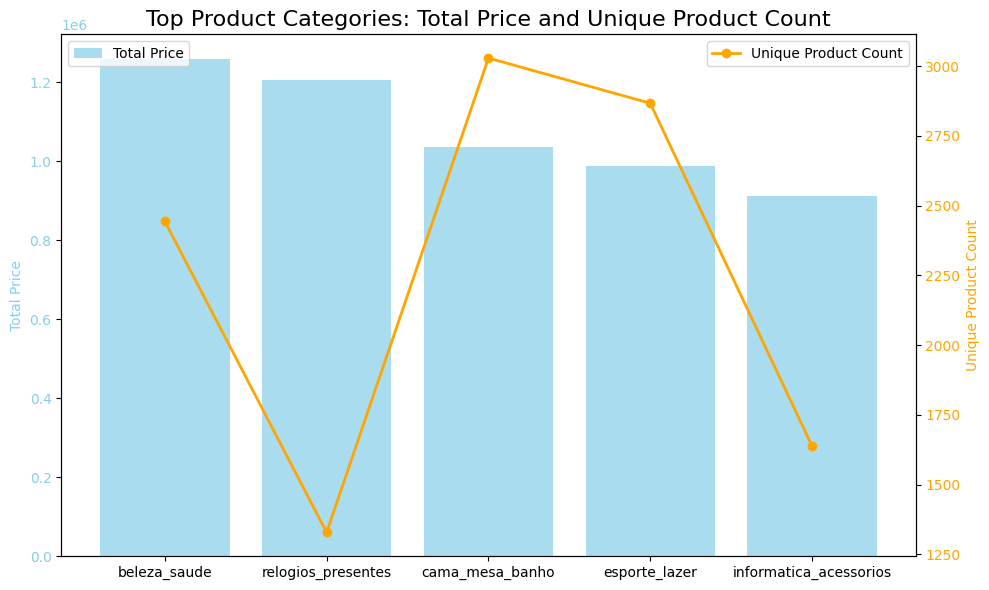

In [73]:
categories = category_summary_sorted.head(5)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(categories['Product Category'], categories['Total Price'], color='skyblue', alpha=0.7, label='Total Price')
ax1.set_ylabel('Total Price', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()
ax2.plot(categories['Product Category'], categories['Unique Product Count'], color='orange', marker='o', linewidth=2, label='Unique Product Count')
ax2.set_ylabel('Unique Product Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Top Product Categories: Total Price and Unique Product Count', fontsize=16)
fig.tight_layout() 
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.show()

**Insight:**
- Kategori "beleza_saude" memiliki jumlah produk unik tertinggi (2,444) dan total harga yang signifikan (Rp 1,258,681.34). Ini menunjukkan bahwa pasar untuk produk kesehatan dan kecantikan memiliki permintaan yang kuat, dan mungkin menjadi area yang baik untuk memperluas penawaran produk atau meningkatkan pemasaran.
- Kategori "cama_mesa_banho" juga menunjukkan total harga yang tinggi (Rp 1,215,623.96) dengan jumlah produk unik yang cukup besar (3,639). Ini menunjukkan bahwa konsumen aktif berinvestasi dalam produk untuk kebutuhan rumah tangga. Perusahaan bisa mempertimbangkan untuk menawarkan lebih banyak varian produk atau meningkatkan kualitas produk dalam kategori ini untuk menarik perhatian lebih banyak pelanggan.

## Analisis Lanjutan (Opsional)

In [74]:
rfm_df = customer_order_payment_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "payment_value": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,107.01


In [75]:
rfm_df['max_order_timestamp'] = pd.to_datetime(rfm_df['max_order_timestamp'])

# Menghitung recency
recent_date = orders_df['order_purchase_timestamp'].max().date()  # Pastikan ini adalah tanggal terbaru dari pembelian
rfm_df['recency'] = (recent_date - rfm_df['max_order_timestamp'].dt.date).apply(lambda x: x.days)

# Lihat hasil akhir
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,114.74,337
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,107.01,198


In [76]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337
1,000161a058600d5901f007fab4c27140,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,1,107.01,198


In [77]:
rfm_df.describe()

,frequency,monetary,recency
count,99440.0,99440.000000,99440.000000
mean,1.0,160.990267,290.268212
std,0.0,221.951257,153.664106
min,1.0,0.000000,0.000000
25%,1.0,62.010000,166.000000
50%,1.0,105.290000,272.000000
75%,1.0,176.970000,400.000000
max,1.0,13664.080000,773.000000


In [78]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
63969,a4b417188addbc05b26b72d5e44837a1,1,89.71,0
51713,856336203359aa6a61bf3826f7d84c49,1,222.03,1
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,1,197.55,14
74610,bf6181a85bbb4115736c0a8db1a53be3,1,80.38,16
15595,2823ffda607a2316375088e0d00005ec,1,137.03,18


In [79]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
99423,fff5169e583fd07fac9fec88962f189d,1,152.77,159
99422,fff4fdd0de70a51d4e0f57a4c1c6bfae,1,21.04,191
99421,fff4f0c85a4d710abe06599e1ed08a42,1,89.70,571
99420,fff415b4c72e09483a25c15108c65d31,1,84.57,327
99419,fff3a5c6d542d52b05f7e4518adf996e,1,83.23,241


C:\Users\hp\AppData\Local\Temp\ipykernel_8276\4286489001.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\hp\AppData\Local\Temp\ipykernel_8276\4286489001.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\hp\AppData\Local\Temp\ipykernel_8276\4286489001.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

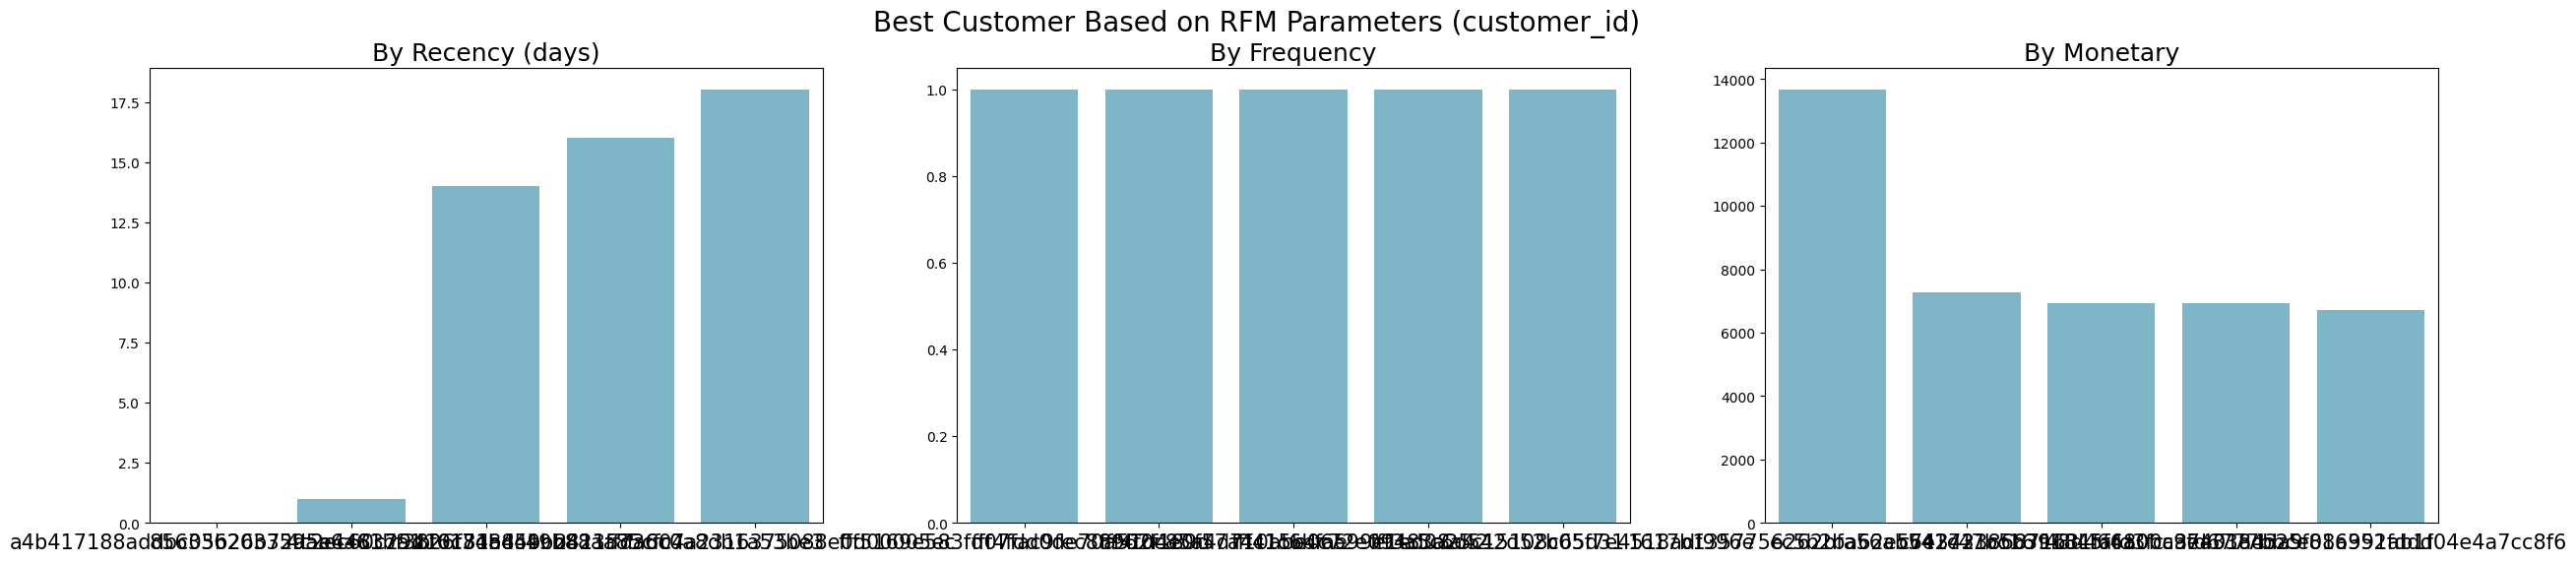

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight:**
- Pelanggan yang lebih baru (dengan nilai recency lebih rendah) biasanya menunjukkan keterlibatan yang lebih besar dengan merek. Hal ini bisa berarti bahwa strategi pemasaran yang baru-baru ini diterapkan berhasil menarik perhatian pelanggan baru. Penting untuk terus memantau nilai recency untuk memastikan bahwa pelanggan tetap terlibat.
- Jika grafik menunjukkan bahwa pelanggan dengan nilai monetary yang lebih tinggi adalah yang terbaik, ini menunjukkan bahwa mereka mengeluarkan lebih banyak uang dalam pembelian. Ini mengindikasikan potensi untuk meningkatkan loyalitas pelanggan. Strategi untuk mempertahankan pelanggan ini, seperti program loyalitas atau penawaran khusus, bisa jadi sangat efektif.

#### Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [81]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337,34363.5,49720.5,53951.5
1,000161a058600d5901f007fab4c27140,1,67.41,458,16870.5,49720.5,28878.0
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596,2881.0,49720.5,78306.0
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427,21180.5,49720.5,75142.0
4,000379cdec625522490c315e70c7a9fb,1,107.01,198,66985.5,49720.5,50617.5


In [82]:
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337,34.557019,100.0,54.255330
1,000161a058600d5901f007fab4c27140,1,67.41,458,16.965507,100.0,29.040628
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596,2.897224,100.0,78.746983
3,0002414f95344307404f0ace7a26f1d5,1,179.35,427,21.299779,100.0,75.565165
4,000379cdec625522490c315e70c7a9fb,1,107.01,198,67.362731,100.0,50.902554


In [83]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.21
1,000161a058600d5901f007fab4c27140,2.35
2,0001fd6190edaaf884bcaf3d49edf079,3.67
3,0002414f95344307404f0ace7a26f1d5,3.71
4,000379cdec625522490c315e70c7a9fb,3.36
5,0004164d20a9e969af783496f3408652,2.36
6,000419c5494106c306a97b5635748086,2.33


#### Segmentasi customer berdasarkan RFM_score

In [84]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.21,Medium value customer
1,000161a058600d5901f007fab4c27140,2.35,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.67,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.71,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.36,Medium value customer
5,0004164d20a9e969af783496f3408652,2.36,Low value customers
6,000419c5494106c306a97b5635748086,2.33,Low value customers
7,00046a560d407e99b969756e0b10f282,3.79,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.73,Low value customers
9,000598caf2ef4117407665ac33275130,4.95,Top customers


In [85]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,16194
1,Low value customers,41904
2,Medium value customer,34697
3,Top customers,5572
4,lost customers,1073


In [86]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

C:\Users\hp\AppData\Local\Temp\ipykernel_8276\1016365800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


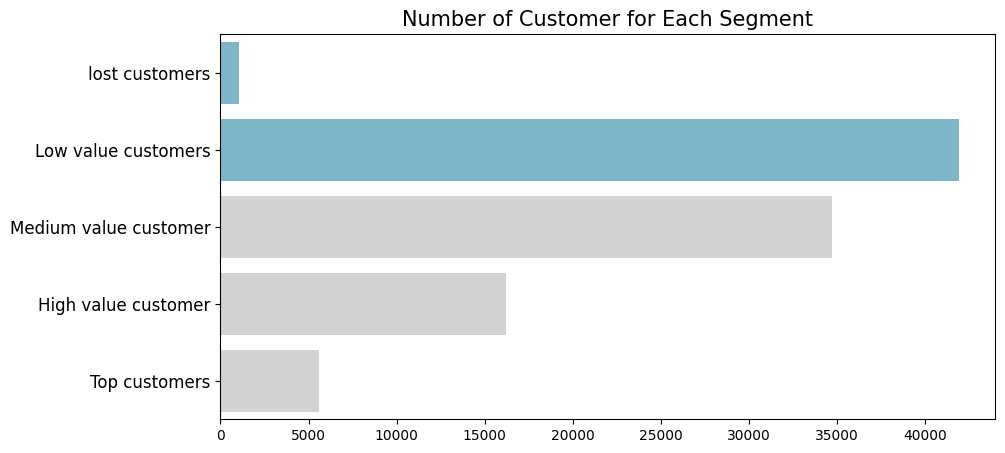

In [87]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2